# Deep Convolutional Generative Adversarial Network using Pytorch Framework


Generative Adversarial Networks or it's acronym GANs have been a buzzword the past two years after Ian Goodfellow et al. introduced them in 2014. In this tutorial I'm about to explain the inner workings of Deep Convolutional GANs, a unsupervised learning algorithm for image representation, with a coding example on the CIFAR-10 image dataset.

To tackle what GANs are in terms of structure and functionality I assume you understand that neural networks are more than just an 'input - blackbox - ouput' model for prediction, classification or other statistical means. You understand that the input to any neural network is a tensor of d + 1 dimensions for d < 2, and that weights are updated through an gradient descent optimization (GDO) algorithm  by calculating the gradient of the loss function. Depending on the n dimensional output of your data, for example 4 different colors in color classification of an image, you decide which GDO algorithm to choose. 

If you have no idea what that means, or want to freshen up your memory, I've provided a link that provides you with sufficient heuristics:

https://www2.econ.iastate.edu/tesfatsi/DeepLearningInNeuralNetworksOverview.JSchmidhuber2015.pdf



# Overview

Theory
1. Generative Adversarial Networks (GANs)
2. Convolutional networks (CNN)
3. DC GANs (DCGAN)
4. Data, Pytorch, libraries

Practice
 - Defining the DCGAN model
5. Hyperparameters, transformations and dataset loading
6. Weights initialising function
7. Generator Neural Network (Inverse Conv2D)
8. Discriminator Neural Network (Conv2D)
9. Criterion and optimizers

 - Running the DCGAN model
10. Iteration
11. Animation
12. Conclusion
13. Full Code


# 1. Generative Adversarial Networks (GANs)


GANs are (un)supervised learning algorithms consisting of an supervised part, in which a discriminator D algorithm  is trained on a subset of real images, and an unsupervised part, in which the generator G algorithm is trained to create images validated by the discriminator D algorithm. It is unsupervised because we can not predeterminally define the outcome of the validation task of the discriminator D algorithm. 


In [20]:
from IPython.display import Image
from IPython.core.display import HTML 
from IPython.core.display import display, HTML

display(HTML("""<a href="
https://www.kdnuggets.com/2017/01/generative-adversarial-networks-hot-topic-machine-learning.html">Source</a>"""))

Image(url= "https://www.kdnuggets.com/wp-content/uploads/generative-adversarial-network.png")


In the image aboven we see how a double multilayered perceptron is connected to eventually minimize log(1 -D(G(z)), where z is the input noise variables. To define the generator's distribution p(g) on data x, we represent a mapping to data space as G(z; theta-g), in which theta-g are the model parameters. Simply put, G takes in z noise and outputs a mapping by the model parameters theta-g of the model. The second multilayer perceptron D(x; theta-d) outputs a single scalar/value. D(x) represents the probability that x is a real image rather than being an image created by the generator distribution p(g). We train D to maximize the probability of assigning the correct label to both real images and samples created from G. We do this by iterating over the data in 25 epochs in this tutorial. By minimizing the loss function log(1 -D(G(z)) and updating the weights of D every iteration to correctly label x as real images we created our Generative Adversarial Network.

What can we do with GANs?


# 2. Convolutional Networks

The year is 2018 and China has a full digital enclosed artificial intelligence backed governing social digit program. Citizens score credits by being +1 or -1 behavior type citizens, starting with a score of 1000. Apart from the ethical concerns such an Orwellian state policy implies, China operationalised a nation-wide ID-tagged object, face and body detection and monitoring system. I can't imagine the work being done to make such a system economically scalable. Maybe it has something to do with coal mine investments...I deter. To perform detection various types of convolutional networks are used do detect. The difference between a multilayer perceptron and a CNN are the convolutions done by kernels/filters on the pixels of the image and the subsequent subsamples of the pooled feature maps following non-linearity as input to a higher level reasoning ANN that minimises the loss function with a gradient descent algorithm. In that way labeled features can be learned and weights of the CNN appropriated to a desired output for detection or classification.

Check out this neat link if you want some tips on modifying your hyperparameters to optimise your results. Chapter 11.4 and on... [[1]](https://www.deeplearningbook.org/contents/guidelines.html). 

Check this statistical freshener to see how to set up ANN architecture using sklearn [[2]](https://github.com/NKVDL/jupyter_notes/blob/master/Statistical_Freshener%20-Titanic%20Example.ipynb)   


In [14]:
Image(url="https://cdn-images-1.medium.com/max/1200/1*XbuW8WuRrAY5pC4t-9DZAQ.jpeg" )

A kernel strides over the pixels of an image left to right and performs an convolution on those pixels. After a rectifying linear unit is applied to support non-linearity the convolution maps are filtered again and pooled. This is repeated n times or constructed such that eventually the output of the CNN is flattened to maintain positional relativity to the input space of the CNN, namely the image space. Then a multilayer perceptron is used for the classification of the output of the CNN based on a subset of actual features. 

# 3. Deep Convolutional GANs 

In DCGANs the generator algorithm architecture consists of an inverse convolution from an uniform distribution z noise  following a leaky ReLu, subsequent batch normalization and optional repetition before being validated by D of D(x; theta-d) as a real image based on the features generated by G.

In [19]:
Image(url = "https://gluon.mxnet.io/_images/dcgan.png ")

We begin with our inverse convolutional network. On the left we initialise from an uniform distribution z a 100 pixel imput consisting of three channels; red, green and blue. Then we reshape our pixel input to a 4D-tensor h*w*l*c, where c is color, with 1024 dimensions. We then convolve images with predefined kernel sizes and stride over the images to create higher dimensional feature maps of 512, 256, 128 and eventually 3, one for every channel on a 64 * 64 output image. This image generated by G goes through D, a convolutional neural network without pooling, to output a scalar that classifies a real image, where D(x) > 0.5.

# 4. Data, Pytorch

For this tutorial we use the data from the CIFAR-10 dataset. Our data consists of 60,000 32*32 colour images divided evenly among 10 classes. For training our discriminator we iterate over 50,000 images of the dataset, which are divided in five training batches of 10,000 images, and one test batch of 10,000 images. The test batch contains exactly 1000 randomly-selected images from each class. The training batches contain the remaining images in random order, but some training batches may contain more images from one class than another. Between them, the training batches contain exactly 5000 images from each class. 

[Data Source](https://www.cs.toronto.edu/~kriz/cifar.html)

Pytorch is a widely used framework for machine and deep learning by companies like Salesforce and Udacity. It enables programmers to built neural networks with open-source module implementation and allows for finetuning your hyperparameters. We'll use it too.

[PyTorch](https://pytorch.org/)


-------------------------------------------------------------------------------------------------------------------------------

-------------------------------------------------------------------------------------------------------------------------------

-------------------------------------------------------------------------------------------------------------------------------

# Practice

# 5. Hyperparameters, transformations and dataset loading

First the code: 

In [34]:
#Import libraries
from __future__ import print_function
import torch
import torch.nn as nn
import torch.optim as optim
import torch.utils.data
import torchvision.datasets as dset
import torchvision.transforms as transforms
import torchvision.utils as vutils
from torch.autograd import Variable

#Set hyperparameters
batchSize = 64
imageSize = 64

#Compose a list of transformations
transform = transforms.Compose([transforms.Resize(imageSize), #Scale images to 64 pixel values for D(x)
                                transforms.ToTensor(), #Transform to tensor
                                transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),]) # Apply normalization

# Loading the dataset
dataset = dset.CIFAR10(root = './data', #Set root to data folder
                       download = True, #Download training set
                       transform = transform) #Apply the previous transformations on each image.

dataloader = torch.utils.data.DataLoader(dataset, #Load dataset
                                         batch_size = batchSize, #Create 64 batches per image
                                         shuffle = True, #Get images in random order
                                         num_workers = 2) #Two parallel threads to load the data


Files already downloaded and verified


We import the following modules from the torch library:
    - torch.nn: this module holds the architecture of our DCGANN.
    - torch.optim: this module operates the optimiser coefficients.
    - torch.utils.data: this modules creates a class of our dataset.
    - torchvision.datasets: this module is used to initialise our weights. 
    - torchvision.transforms.dataset: this module is used to transform our images. 
    - torchvision.utils: this module is used to save our images.  
    - torch.autograd import Variable: this module is used to make our network differentiable and return the output                                           of the optimizer.
    
[Check the docs for more info per module](https://pytorch.org/docs/stable/index.html)
    




# 6. Weights initialising function

In [23]:
##Define function to initialise the weights.
def weights_init(m):
    classname = m.__class__.__name__ #Get classname
    if classname.find('Conv') != -1: #Find all extensions with 'conv'
        m.weight.data.normal_(0.0, 0.02) #Initialise weights
    elif classname.find('BatchNorm') != -1:
        m.weight.data.normal_(1.0, 0.02)
        m.bias.data.fill_(0)


In our weight_init function we assume that input m is a neural network and contains .__class__.__name__.. With it we find and initialise the weights of the network. 

# 7. Generator Neural Network (Inverse Conv2D)

In [24]:
#Defining the generator
class G(nn.Module):         #Inherit modules from the Torch library
      
    def __init__(self): #Taking the object and setting properties to it
        super(G, self).__init__()    #Activate inheritance from nn.Module
        
        #The following is added to self as main that contains all modules in sequence of layers
        self.main = nn.Sequential(  
                #Inverse convolution, CNN = image to vector, GAN = random vector to image
                nn.ConvTranspose2d(100, 512, 4, 1, 0, bias = False ) ,#image size, feature maps ,kernel size, stride, padding
                nn.BatchNorm2d(512),#Normalise all 512 feature maps in batches
                nn.ReLU(True), #Keep lineair position of feature maps of the image
                nn.ConvTranspose2d(512, 256,4, 2, 1, bias =False),
                nn.BatchNorm2d(256),#Normalise all 256 feature maps in batches
                nn.ReLU(True), #Keep lineair position of feature maps of the image
                nn.ConvTranspose2d(256, 128 ,4, 2, 1, bias =False),
                nn.BatchNorm2d(128),#Normalise all 512 feature maps in batches
                nn.ReLU(True), #Keep lineair position of feature maps of the image)
                nn.ConvTranspose2d(128, 64 ,4, 2, 1, bias =False),
                nn.BatchNorm2d(64),#Normalise all 512 feature maps in batches
                nn.ReLU(True), #Keep lineair position of feature maps of the image)
                nn.ConvTranspose2d(64, 3, 4, 2, 1, bias = False),
                #Hyperbolic activation 
                nn.Tanh() 
                )

We create a class G to define our generator and a function that forwards our noise z through the network. The class G calls the nn.Module to inherit modules from the Torch library.

We initialise the architecture of G by creating an __init__ function that calls self. This refers to taking the object that is passed into it and setting properties to that object. We then activate the inheritance from the nn.Module.

We set the object to self.main as an nn.Sequential object, which is an ordered list in which we can set all modules to our preference in a sequence of layers. 

We set up our inverse convolutional network by calling the first element of our Sequential object, nn.ConVTranspose2D, and set the hyperparameters accordingly. The first layer has an image size of 100 pixels and an output of 512 feature maps, created by a kernel size of 4, with one stride and 0 padding. These parameter settings have been tested on this dataset before. 

We then call nn.BatchNorm2d to normalize all 512 feature maps in batches. All pixel values are now between 0 and 1.

We then call nn.ReLu to perform a rectifying linear unit. ReLu is an activation function that operates on the output of nodes in the network of G. Here's where the neuron analogy comes into play. Weights, be it whatever molecular process, in a neuron are operating on the firing of an action potential. We set to True to modify the input directly, without allocating any additional output and save up energy. 

We repeat this untill the input and output of the feature maps have been reduced to 64 and 3. We then converge the output of the network through an Tanh activation function, generating a scalar between -1 and +1. 



In [26]:
        #Create function to forward noise through the generator        
        def forward(self,input): #random vector input for the generator
            output = self.main(input)
            return output 

We create a function that takes as argument input. Again, we call the object self to refer to the passed object into the function as self. We then forward the signal through the self.main of a neural network and return the propagation of the signal through the network. 

In [27]:
#Create generator neural net
netG = G() 
#Initialise weights to generator neural net
netG.apply(weights_init)

G(
  (main): Sequential(
    (0): ConvTranspose2d(100, 512, kernel_size=(4, 4), stride=(1, 1), bias=False)
    (1): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): ConvTranspose2d(512, 256, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (4): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU(inplace)
    (6): ConvTranspose2d(256, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (7): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (8): ReLU(inplace)
    (9): ConvTranspose2d(128, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (10): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (11): ReLU(inplace)
    (12): ConvTranspose2d(64, 3, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (13): Tanh()
  )
)

# 8. Discriminator Neural Network 

In [28]:
##Defining discrimator
class D(nn.Module): #Again inherit from nn.Module
    def __init__(self): #Refers to objects as future instances(self) of different modules composing the discrimator neural net
        super(D,self).__init__() # Activate the inheritance from the nn.Module
        self.main = nn.Sequential( #Reverse order
                
                nn.Conv2d(3, 64, 4, 2, 1, bias = False),
                nn.LeakyReLU(0.2, inplace=True), #Set to true 
                nn.Conv2d(64, 128, 4, 2, 1, bias = False),
                nn.BatchNorm2d(128),#Normalise all 128 feature maps in batches
                nn.LeakyReLU(0.2, inplace=True), 
                nn.Conv2d(128, 256, 4, 2, 1, bias = False),
                nn.BatchNorm2d(256),#Normalise all 256 feature maps in batches
                nn.LeakyReLU(0.2, inplace=True), 
                nn.Conv2d(256, 512, 4, 2, 1, bias = False),
                nn.BatchNorm2d(512),#Normalise all 512 feature maps in batches
                nn.LeakyReLU(0.2, inplace=True), 
                nn.Conv2d(512, 1, 4, 2, 0, bias = False), #Discriminator returns number between 0 and 1 = single dimensions. Images with values above 0.5 we will use.
                nn.Sigmoid()
                )
        
        #Create function to forward image created by thr generator, image of 3 dimensions, created by the 3 channels, through the discriminator        
        def forward(self,input): #Takes as image generated by the generator, and discriminates based on the output = between 0 and 1. 
            output = self.main(input)
            return output.view(-1) #Flatten elements of the output of last convolution, from 2D to 1D = -1.

#Creating the discriminator        
netD = D()
#Initialise weights to discriminator neural net
netD.apply(weights_init)

D(
  (main): Sequential(
    (0): Conv2d(3, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (1): LeakyReLU(negative_slope=0.2, inplace)
    (2): Conv2d(64, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (3): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (4): LeakyReLU(negative_slope=0.2, inplace)
    (5): Conv2d(128, 256, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (6): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): LeakyReLU(negative_slope=0.2, inplace)
    (8): Conv2d(256, 512, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (9): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (10): LeakyReLU(negative_slope=0.2, inplace)
    (11): Conv2d(512, 1, kernel_size=(4, 4), stride=(2, 2), bias=False)
    (12): Sigmoid()
  )
)

As with G, we set up our neural network by calling our modules from nn.Sequential. This time we use a normal convolution to asses features in the images generated by G. We converge the network with a sigmoid activation function so that D returns a number between 0 and 1. 

We define the same forward function as in G, but in the return output we flatten the elements of the last convolution from 2-dimensional to 1-dimensional. 

We then create the network as a variable and initialise the weights.

# 9. Criterion and optimizers

Back-propagation is done into the generator weights, not the discriminator weights, 
because the discriminator weights are trained to detect real images, and those 
weights are used to output a number between 0 and 1 on images generated by the 
generator. To do this we have to create a criterion object that measures the error of prediction of the discriminator, where ground truth will be 0 for fake images and 1 for real images.



In [29]:
criterion = nn.BCELoss() #Binary Cross-Entropy, between 0 and 1 output on images 1 or 0.


We call our variable criterion from nn.BCELoss, which stands for Binary Cross-Entropy Loss. In 1948 an article named 'A Mathematical Theory of Communication' was published in Bell System Technical Journal by the mathematician Claude E. Shannon. In this paper the concept of information entropy was first introduced. Entropy is the average rate of information being produced in a known distribution. When tossing a fair coin entropy is highest, because under the known distribution we assume chances are 1/2, and thus have 1 bit of information. We can calculate the loss of information as a function of how the weights of the neural networks G and D are updated to minimise error between our predicted value and ground truth, which is 1. Having less uncertainty in our network and therefore lower entropy, enables better prediction with less bits of information. 

In [30]:
Image(url= "https://cdn-images-1.medium.com/max/1200/1*PK0iVgkQepmVCprtTgbsGg.png")


We create two optimizers for our network, one for G and D each, and define our learning rate to take increments of 0.00002. To optimise our network we use the ADAM algorithm, which stands for, Adaptive Moment Estimation. ADAM differs in that for each weight (xi) an adaptive learning rate parameter is estimated while performing a stochastic gradient. 

Specifically, the algorithm calculates an exponential moving average of the gradient and the squared gradient, and the parameters beta1 and beta2 control the decay rates of these moving averages. 

In [31]:
optimizerD = optim.Adam(netD.parameters(), lr = 0.0002, betas = (0.5, 0.999)) 
optimizerG = optim.Adam(netG.parameters(), lr = 0.0002, betas = (0.5, 0.999))


[More info, right bar has pdf](https://arxiv.org/abs/1412.6980)

# 10. Iteration

Every epoch we have to iterate over the images of the dataset. We begin by initialising the gradients of D to 0 with respect to the weights. We train the discriminator by wrapping a image of our real dataset into a Torch variable and get the target, which is 1. We then propagate our real image into the neural network of D to get a value between 0 and 1. We do exactly the same thing for training D to recognise fake images by wrapping a random input vector of the generator to calculate the loss between the prediction and the target, which is 0.

In [ ]:
for epoch in range(25): # We iterate over 25 epochs.

    for i, data in enumerate(dataloader, 0): # We iterate over the images of the dataset.
        
        # 1st Step: Updating the weights of the neural network of the discriminator

        netD.zero_grad() # We initialize to 0 the gradients of the discriminator with respect to the weights.
        
        # Training the discriminator with a real image of the dataset
        real, _ = data # We get a real image of the dataset which will be used to train the discriminator.
        input = Variable(real) # We wrap it in a variable.
        target = Variable(torch.ones(input.size()[0])) # We get the target.
        output = netD(input) # We forward propagate this real image into the neural network of the discriminator to get the prediction (a value between 0 and 1).
        errD_real = criterion(output, target) # We compute the loss between the predictions (output) and the target (equal to 1).
        
        # Training the discriminator with a fake image generated by the generator
        noise = Variable(torch.randn(input.size()[0], 100, 1, 1)) # We make a random input vector (noise) of the generator.
        fake = netG(noise) # We forward propagate this random input vector into the neural network of the generator to get some fake generated images.
        target = Variable(torch.zeros(input.size()[0])) # We get the target.
        output = netD(fake.detach()) # We forward propagate the fake generated images into the neural network of the discriminator to get the prediction (a value between 0 and 1).
        errD_fake = criterion(output, target) # We compute the loss between the prediction (output) and the target (equal to 0).

       

We than calculate the total error of the real and fake images and backprogate the loss error by computing the gradients of the total error with respect to the weights of the discriminator. We then optimise our network by updating the weights of D accordingly. 

In [ ]:
        #Backpropagating the total error
        errD = errD_real + errD_fake # We compute the total error of the discriminator.
        errD.backward() # We backpropagate the loss error by computing the gradients of the total error with respect to the weights of the discriminator.
        optimizerD.step() # We apply the optimizer to update the weights according to how much they are responsible for the loss error of the discriminator.     

With our appropriated network we then calculate the loss error between the prediction by D of generated fake image as real or fake. As mentioned before, the final output is a scalar between 0 and 1. Images validated as real have an output > 0.5. For every iteration we print the BCE loss for D and G. 

In [ ]:
        # 2nd Step: Updating the weights of the neural network of the generator
        netG.zero_grad() # We initialize to 0 the gradients of the generator with respect to the weights.
        target = Variable(torch.ones(input.size()[0])) # We get the target.
        output = netD(fake) # We forward propagate the fake generated images into the neural network of the discriminator to get the prediction (a value between 0 and 1).
        errG = criterion(output, target) # We compute the loss between the prediction (output between 0 and 1) and the target (equal to 1).
        errG.backward() # We backpropagate the loss error by computing the gradients of the total error with respect to the weights of the generator.
        optimizerG.step() # We apply the optimizer to update the weights according to how much they are responsible for the loss error of the generator.
        
        #3rd Step: Printing the losses and saving the real images and the generated images of the minibatch every 100 steps

        print('[%d/%d][%d/%d] Loss_D: %.4f Loss_G: %.4f' % (epoch, 25, i, len(dataloader), errD.data[0], errG.data[0])) # We print thr losses of the discriminator (Loss_D) and the generator (Loss_G).
        if i % 100 == 0: # Every 100 steps:
            vutils.save_image(real, '%s/real_samples.png' % "./results", normalize = True) # We save the real images of the minibatch.
            fake = netG(noise) # We get our fake generated images.
            vutils.save_image(fake.data, '%s/fake_samples_epoch_%03d.png' % ("./results", epoch), normalize = True) # We also save the fake generated images of the minibatch.

If you run the script your output should look something like this:

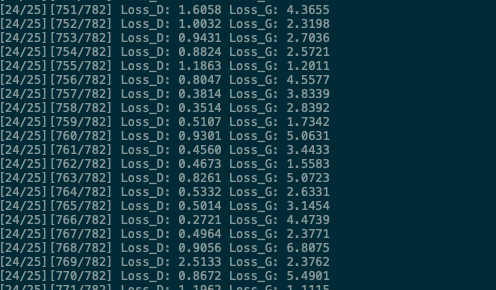

In [40]:
PATH = "/Users/NVDL/"
Image(filename = PATH + "example.png")


# 11. Animation

In [ ]:
import os
import imageio

png_dir = './results'
images = []
for file_name in sorted(os.listdir(png_dir)):
    if file_name.endswith('.png'):
        file_path = os.path.join(png_dir, file_name)
        images.append(imageio.imread(file_path))

imageio.mimsave('./img/DCGAN.gif', images, duration = 0.8) #Adjust duration per frame


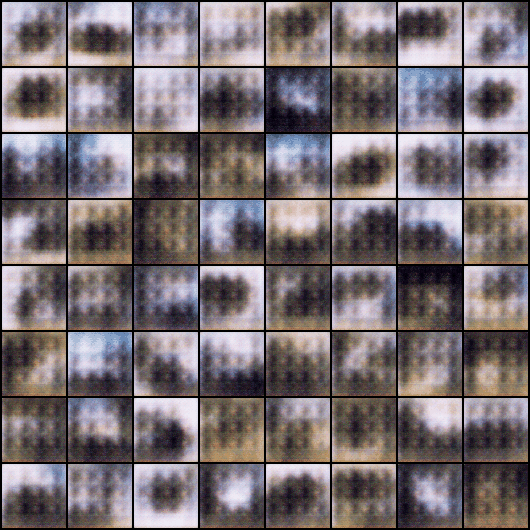

In [42]:
from IPython.display import Image
Image(filename="./img/DCGAN.gif.png")

# 12. Conclusion

We used an inverse convolution to generate fake images, and a convolution to discriminate real from fake images and validate generated images. Over iterations the model stochastically converged towards minimising the loss error and accurately create shapes and figures that represent real images. I was able to see a boot, houses, persons and animals. Pretty cool! 

Thank you for reading my notebook.

# 13. Full Code

In [ ]:
# Importing the libraries
from __future__ import print_function
import torch
import torch.nn as nn
import torch.nn.parallel
import torch.optim as optim
import torch.utils.data
import torchvision.datasets as dset
import torchvision.transforms as transforms
import torchvision.utils as vutils
from torch.autograd import Variable

# Setting some hyperparameters
batchSize = 64 # We set the size of the batch.
imageSize = 64 # We set the size of the generated images (64x64).

# Creating the transformations
transform = transforms.Compose([transforms.Scale(imageSize), transforms.ToTensor(), transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),]) # We create a list of transformations (scaling, tensor conversion, normalization) to apply to the input images.

# Loading the dataset
dataset = dset.CIFAR10(root = './data', download = True, transform = transform) # We download the training set in the ./data folder and we apply the previous transformations on each image.
dataloader = torch.utils.data.DataLoader(dataset, batch_size = batchSize, shuffle = True, num_workers = 2) # We use dataLoader to get the images of the training set batch by batch.

# Defining the weights_init function that takes as input a neural network m and that will initialize all its weights.
def weights_init(m):
    classname = m.__class__.__name__
    if classname.find('Conv') != -1:
        m.weight.data.normal_(0.0, 0.02)
    elif classname.find('BatchNorm') != -1:
        m.weight.data.normal_(1.0, 0.02)
        m.bias.data.fill_(0)

# Defining the generator

class G(nn.Module):

    def __init__(self):
        super(G, self).__init__()
        self.main = nn.Sequential(
            nn.ConvTranspose2d(100, 512, 4, 1, 0, bias = False),
            nn.BatchNorm2d(512),
            nn.ReLU(True),
            nn.ConvTranspose2d(512, 256, 4, 2, 1, bias = False),
            nn.BatchNorm2d(256),
            nn.ReLU(True),
            nn.ConvTranspose2d(256, 128, 4, 2, 1, bias = False),
            nn.BatchNorm2d(128),
            nn.ReLU(True),
            nn.ConvTranspose2d(128, 64, 4, 2, 1, bias = False),
            nn.BatchNorm2d(64),
            nn.ReLU(True),
            nn.ConvTranspose2d(64, 3, 4, 2, 1, bias = False),
            nn.Tanh()
        )

    def forward(self, input):
        output = self.main(input)
        return output

# Creating the generator
netG = G()
netG.apply(weights_init)

# Defining the discriminator

class D(nn.Module):

    def __init__(self):
        super(D, self).__init__()
        self.main = nn.Sequential(
            nn.Conv2d(3, 64, 4, 2, 1, bias = False),
            nn.LeakyReLU(0.2, inplace = True),
            nn.Conv2d(64, 128, 4, 2, 1, bias = False),
            nn.BatchNorm2d(128),
            nn.LeakyReLU(0.2, inplace = True),
            nn.Conv2d(128, 256, 4, 2, 1, bias = False),
            nn.BatchNorm2d(256),
            nn.LeakyReLU(0.2, inplace = True),
            nn.Conv2d(256, 512, 4, 2, 1, bias = False),
            nn.BatchNorm2d(512),
            nn.LeakyReLU(0.2, inplace = True),
            nn.Conv2d(512, 1, 4, 1, 0, bias = False),
            nn.Sigmoid()
        )

    def forward(self, input):
        output = self.main(input)
        return output.view(-1)

# Creating the discriminator
netD = D()
netD.apply(weights_init)

# Training the DCGANs

criterion = nn.BCELoss()
optimizerD = optim.Adam(netD.parameters(), lr = 0.0002, betas = (0.5, 0.999))
optimizerG = optim.Adam(netG.parameters(), lr = 0.0002, betas = (0.5, 0.999))

for epoch in range(25):

    for i, data in enumerate(dataloader, 0):
        
        # 1st Step: Updating the weights of the neural network of the discriminator

        netD.zero_grad()
        
        # Training the discriminator with a real image of the dataset
        real, _ = data
        input = Variable(real)
        target = Variable(torch.ones(input.size()[0]))
        output = netD(input)
        errD_real = criterion(output, target)
        
        # Training the discriminator with a fake image generated by the generator
        noise = Variable(torch.randn(input.size()[0], 100, 1, 1))
        fake = netG(noise)
        target = Variable(torch.zeros(input.size()[0]))
        output = netD(fake.detach())
        errD_fake = criterion(output, target)
        
        # Backpropagating the total error
        errD = errD_real + errD_fake
        errD.backward()
        optimizerD.step()

        # 2nd Step: Updating the weights of the neural network of the generator

        netG.zero_grad()
        target = Variable(torch.ones(input.size()[0]))
        output = netD(fake)
        errG = criterion(output, target)
        errG.backward()
        optimizerG.step()
        
        # 3rd Step: Printing the losses and saving the real images and the generated images of the minibatch every 100 steps

        print('[%d/%d][%d/%d] Loss_D: %.4f Loss_G: %.4f' % (epoch, 25, i, len(dataloader), errD.data[0], errG.data[0]))
        if i % 100 == 0:
            vutils.save_image(real, '%s/real_samples.png' % "./results", normalize = True)
            fake = netG(noise)
            vutils.save_image(fake.data, '%s/fake_samples_epoch_%03d.png' % ("./results", epoch), normalize = True)